In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#import chart_studio.plotly as py
#import plotly.graph_objs as go
#from plotly.offline import plot

#from plotly.offline import download_plotlyjs,init_notebook_mode,plot, iplot
#init_notebook_mode(connected=True)

In [4]:
df = pd.read_csv('/Users/suryaalavala/Downloads/stockmarket.csv')

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,71.300003,0
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,71.639999,0


In [7]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [12]:
#selecting close for predicting future stock price values 
df1 = df.reset_index()['Close']

In [13]:
df1

0      71.324997
1      71.440002
2      71.230400
3      71.300003
4      71.639999
         ...    
257    73.191902
258    72.910896
259    72.954903
260    72.995903
261    72.970001
Name: Close, Length: 262, dtype: float64

In [14]:
df1.shape

(262,)

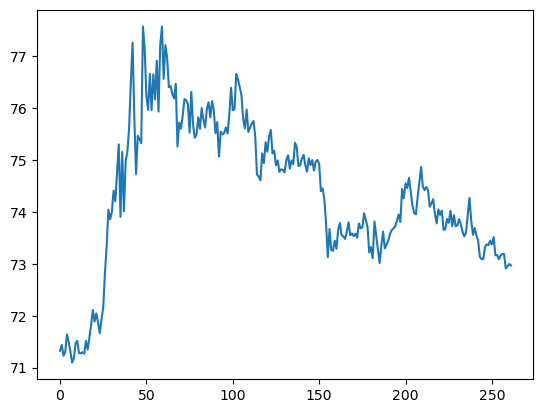

In [15]:
plt.plot(df1)

In [ ]:
#applying minmaxscaler

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [19]:
df1

array([[0.03477572],
       [0.05255083],
       [0.02015486],
       [0.03091266],
       [0.08346226],
       [0.06128282],
       [0.0330918 ],
       [0.        ],
       [0.01236507],
       [0.05718746],
       [0.06422023],
       [0.02782086],
       [0.02709443],
       [0.03032549],
       [0.02604373],
       [0.06411173],
       [0.03851606],
       [0.07341559],
       [0.11244216],
       [0.15610552],
       [0.12160815],
       [0.14632175],
       [0.11901156],
       [0.08707895],
       [0.12828466],
       [0.16228805],
       [0.26661491],
       [0.34652308],
       [0.45479198],
       [0.42582753],
       [0.44749631],
       [0.51097357],
       [0.47990773],
       [0.56568823],
       [0.64915049],
       [0.43338487],
       [0.62673876],
       [0.45013896],
       [0.60000043],
       [0.62746503],
       [0.69893379],
       [0.83554827],
       [0.95208688],
       [0.73346175],
       [0.56037123],
       [0.67465172],
       [0.66460629],
       [0.653

In [21]:
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:]

In [22]:
training_size,test_size

(170, 92)

In [25]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [84]:
time_step = 25
x_train, y_train = create_dataset(train_data,time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [85]:
print(x_train)

[[0.03477572 0.05255083 0.02015486 ... 0.11901156 0.08707895 0.12828466]
 [0.05255083 0.02015486 0.03091266 ... 0.08707895 0.12828466 0.16228805]
 [0.02015486 0.03091266 0.08346226 ... 0.12828466 0.16228805 0.26661491]
 ...
 [0.61823783 0.58732656 0.5675584  ... 0.37867144 0.37516217 0.36763544]
 [0.58732656 0.5675584  0.60741882 ... 0.37516217 0.36763544 0.38871704]
 [0.5675584  0.60741882 0.58775932 ... 0.36763544 0.38871704 0.41731131]]


In [86]:
print(x_test)

[[0.37632137 0.38327732 0.37140638 ... 0.39374037 0.39896417 0.40494624]
 [0.38327732 0.37140638 0.4139719  ... 0.39896417 0.40494624 0.4208501 ]
 [0.37140638 0.4139719  0.39913527 ... 0.40494624 0.4208501  0.44026323]
 ...
 [0.38896464 0.37554888 0.38695537 ... 0.31823777 0.32282834 0.32332355]
 [0.37554888 0.38695537 0.4382232  ... 0.32282834 0.32332355 0.27989141]
 [0.38695537 0.4382232  0.48995333 ... 0.32332355 0.27989141 0.28669311]]


In [87]:
print(x_train.shape),print(y_train.shape)

(144, 25)
(144,)


(None, None)

In [88]:
print(x_test.shape),print(y_test.shape)

(66, 25)
(66,)


(None, None)

In [89]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [103]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(25,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [104]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 25, 50)            10400     
                                                                 
 lstm_16 (LSTM)              (None, 25, 50)            20200     
                                                                 
 lstm_17 (LSTM)              (None, 50)                20200     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [105]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
3/3 [==============================] - 2s 208ms/step - loss: 0.3202 - val_loss: 0.0418
Epoch 2/100
3/3 [==============================] - 0s 23ms/step - loss: 0.0978 - val_loss: 0.0161
Epoch 3/100
3/3 [==============================] - 0s 23ms/step - loss: 0.0418 - val_loss: 0.0501
Epoch 4/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0423 - val_loss: 0.0084
Epoch 5/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0213 - val_loss: 0.0042
Epoch 6/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0308 - val_loss: 0.0043
Epoch 7/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0229 - val_loss: 0.0113
Epoch 8/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0171 - val_loss: 0.0269
Epoch 9/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0213 - val_loss: 0.0279
Epoch 10/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0190 - val_loss: 0.0167
Epoch 11/100
3/3 [

In [56]:
import tensorflow as tf

In [106]:
tf.__version__

'2.13.0'

In [107]:
#lets predict the model
train_predict= model.predict(x_train)
test_predict= model.predict(x_test)

3/3 [==============================] - 0s 3ms/step


In [108]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


In [109]:
#calculating RMSE
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

74.50551701342289

In [110]:
#testdata rmse
math.sqrt(mean_squared_error(y_test,test_predict))

73.65279027856334

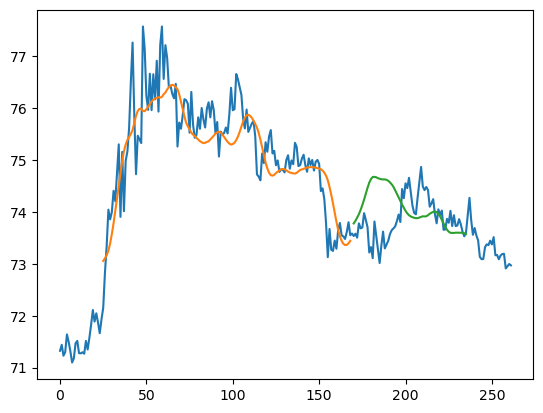

In [112]:
#plotting and shift train prediction for plotting
look_back = 25
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
#shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[look_back+len(train_predict)+1:look_back+len(train_predict)+len(test_predict)+1, :] = test_predict
#plot baseline and predictions 
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [76]:
print(testPredictPlot.shape)
print(test_predict.shape)

(262, 1)
(41, 1)


In [114]:
len(test_data)

92

In [117]:
#taking previous 25 days to predict output
x_input=test_data[67:].reshape(1,-1)
x_input.shape

(1, 25)

In [116]:
92-25


67

In [118]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [119]:
temp_input

[0.48995332613498555,
 0.42346200202102047,
 0.3798765440876224,
 0.4001552086073552,
 0.37788257252470814,
 0.3637711394834202,
 0.3143747096214202,
 0.3074504459194909,
 0.30788321240086347,
 0.34312230506265706,
 0.3515924724598243,
 0.3493048379274075,
 0.3625966421648723,
 0.3513754709813064,
 0.37302894187668123,
 0.31916574368910666,
 0.31992277591258933,
 0.3072028416683654,
 0.31823776870548137,
 0.3228283391566187,
 0.32332354765887317,
 0.2798914127074461,
 0.28669311075947235,
 0.29303004852239667,
 0.28902664945080403]

In [123]:
from numpy import array

lst_output=[]
n_steps=25
i=0
while(i<25):
    
    if(len(temp_input)>25):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.60882914 0.60926217 0.60919988 0.60868126 0.60774779 0.60643625
 0.60478544 0.60282362 0.60057628 0.5980736  0.59533978 0.59240735
 0.58929205 0.58602464 0.58263063 0.57913977 0.57557672 0.57196343
 0.56831276 0.56464922 0.56099427 0.557365   0.55379468 0.55029154
 0.54686576]
0 day output [[0.5435288]]
1 day input [0.60926217 0.60919988 0.60868126 0.60774779 0.60643625 0.60478544
 0.60282362 0.60057628 0.5980736  0.59533978 0.59240735 0.58929205
 0.58602464 0.58263063 0.57913977 0.57557672 0.57196343 0.56831276
 0.56464922 0.56099427 0.557365   0.55379468 0.55029154 0.54686576
 0.5435288 ]
1 day output [[0.5402929]]
2 day input [0.60919988 0.60868126 0.60774779 0.60643625 0.60478544 0.60282362
 0.60057628 0.5980736  0.59533978 0.59240735 0.58929205 0.58602464
 0.58263063 0.57913977 0.57557672 0.57196343 0.56831276 0.56464922
 0.56099427 0.557365   0.55379468 0.55029154 0.54686576 0.5435288
 0.54029292]
2 day output [[0.5371693]]
3 day input [0.60868126 0.60774779 0.6064

In [124]:
day_new=np.arange(1,26)
day_pred=np.arange(26,51)

In [125]:
len(df1)

262

In [127]:
df3=df1.tolist()
df3.extend(lst_output)

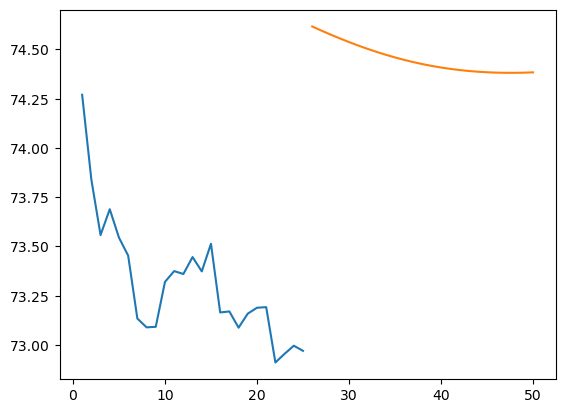

In [130]:
plt.plot(day_new,scaler.inverse_transform(df1[237:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))



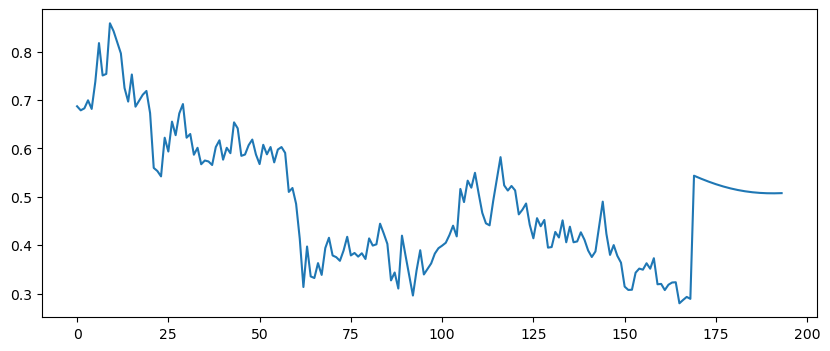

In [137]:
plt.figure(figsize=(10, 4))
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[93:])